# Understanding Descriptive Statistics

Import the necessary libraries here:

In [433]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [366]:
def dice_throw(n):
    throws = random.choices([1,2,3,4,5,6], k=n)
    return pd.DataFrame(throws)

dice_throw(10)

,0
0,4
1,4
2,6
3,3
4,1
5,2
6,4
7,4
8,4
9,3


#### 2.- Plot the results sorted by value.

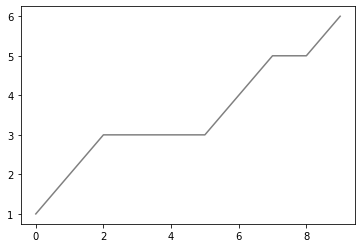

In [367]:
dice= dice_throw(10).sort_values(by=0).reset_index()[0]
plt.plot(dice,color='gray')


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([1., 1., 4., 1., 2., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

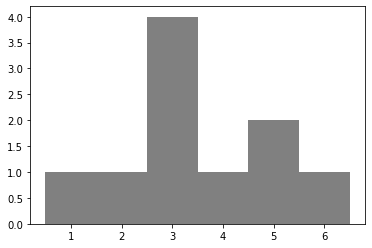

In [368]:
plt.hist(dice, bins=6, range=(0.5,6.5), color= 'gray')

In [369]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [370]:
def average(dice):
    avg = sum(dice) / len(dice)
    return avg


print("The average is", round(average(dice), 2))

The average is 3.5


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [372]:
# frequency distribution
df = pd.Series(dice).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df.columns = ['number', 'frequency']
df


,number,frequency
0,1,1
1,2,1
2,3,4
3,4,1
4,5,2
5,6,1


In [285]:
#mean from frequency distribution
def average2(df):
    avg2 = sum(df['number'] * df['frequency'])/ df['frequency'].sum()
    return avg2

print("The average is", round(average2(df), 2))


The average is 3.3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [286]:
print(dice)

0    1
1    2
2    3
3    3
4    3
5    4
6    4
7    4
8    4
9    5
Name: 0, dtype: int64


In [287]:
def middle(dice):
    srt = sorted(dice)
    mid = len(dice)//2
    if len(dice) % 2 != 0:
            return srt[mid]
    else:
        med = (srt[mid] + srt[mid-1]) / 2
        return med
    
middle(dice)   

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [288]:
def quartiles(dice):
    srt = sorted(dice)
    half_list = int(len(srt)//2)
    upper_quartile = middle(srt[half_list:])
    lower_quartile = middle(srt[:half_list])
    print("Q1: "+str(lower_quartile))
    print("Q2: "+str(middle(dice)))
    print("Q3: "+str(upper_quartile))
    print("IQR: "+str(upper_quartile-lower_quartile))
    

quartiles(dice)

Q1: 3
Q2: 3.5
Q3: 4
IQR: 1


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [289]:
os.getcwd()

'C:\\Users\\joana\\ironhack\\ironhack-labs\\modulo-2\\lab-understanding-descriptive-stats\\data'

In [290]:
os.listdir()

['ages_population.csv',
 'ages_population2.csv',
 'ages_population3.csv',
 'roll_the_dice_hundred.csv',
 'roll_the_dice_thousand.csv']

In [291]:
#change dir in python
path = 'C:\\Users\\joana\\ironhack\\ironhack-labs\\modulo-2\\lab-understanding-descriptive-stats\\data'
os.chdir(path)


In [292]:
os.listdir()

['ages_population.csv',
 'ages_population2.csv',
 'ages_population3.csv',
 'roll_the_dice_hundred.csv',
 'roll_the_dice_thousand.csv']

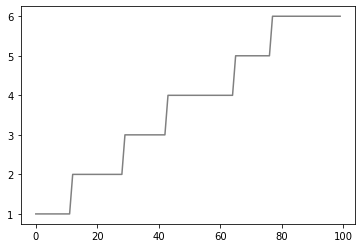

In [333]:
dice_hundred = pd.read_csv('roll_the_dice_hundred.csv')
droped = dice_hundred.drop(['Unnamed: 0'], axis = 1)
df_droped = droped.sort_values(by='value').reset_index()['value']
plt.plot(df_droped,color='gray')

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

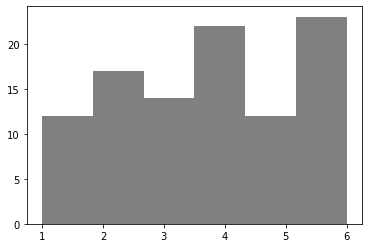

In [334]:
plt.hist(df_droped, bins=6, color= 'gray')

In [296]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [297]:
average(df_droped)

3.74

#### 3.- Now, calculate the frequency distribution.


In [298]:
frequency = df_droped.value_counts().reset_index().sort_values('index').reset_index(drop=True)
frequency.columns = ['number', 'frequency']
frequency

,number,frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

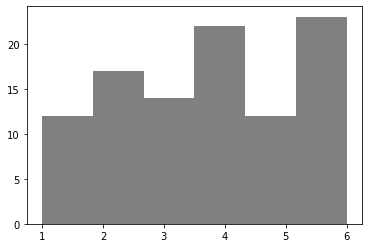

In [299]:
plt.hist(df_droped, bins=6, color= 'gray')

In [300]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175., 167., 175., 168., 149., 166.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

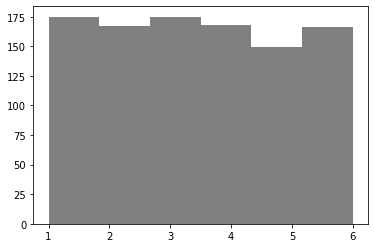

In [332]:
dice_thousand = pd.read_csv('roll_the_dice_thousand.csv')
dice_thousand
droped = dice_thousand.drop(['Unnamed: 0'], axis = 1)
droped
df_droped = droped.sort_values(by='value').reset_index()['value']
df_droped
plt.hist(df_droped, bins=6, color= 'gray')

In [302]:
"""
In probability theory, the law of large numbers describes the result of performing the same experiment a large number of times.
According to the law, the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.
So it does "even out" in the long run.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [381]:
ages_population = pd.read_csv('ages_population.csv')
ages_population


,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [402]:
ages = ages_population['observation'].value_counts().reset_index()
ages.columns = ['age', 'frequency']
ages

,age,frequency
0,39.0,45
1,41.0,36
2,30.0,34
3,35.0,33
4,43.0,32
...,...,...
67,70.0,1
68,71.0,1
69,7.0,1
70,69.0,1


(array([ 4.,  0.,  1.,  2.,  2.,  1.,  5.,  2.,  3.,  3., 11.,  6., 10.,
         8.,  8., 10.,  7., 11., 13., 14., 16., 17., 18., 19., 23., 25.,
        20., 26., 34., 24., 30., 22., 29., 33., 31., 30., 30., 45., 27.,
        36., 32., 32., 23., 29., 23., 17., 19., 19., 16.,  9., 14., 12.,
        13., 13., 15.,  7.,  7.,  8.,  4.,  2.,  4.,  7.,  2.,  2.,  3.,
         4.,  3.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 1.    ,  2.0125,  3.025 ,  4.0375,  5.05  ,  6.0625,  7.075 ,
         8.0875,  9.1   , 10.1125, 11.125 , 12.1375, 13.15  , 14.1625,
        15.175 , 16.1875, 17.2   , 18.2125, 19.225 , 20.2375, 21.25  ,
        22.2625, 23.275 , 24.2875, 25.3   , 26.3125, 27.325 , 28.3375,
        29.35  , 30.3625, 31.375 , 32.3875, 33.4   , 34.4125, 35.425 ,
        36.4375, 37.45  , 38.4625, 39.475 , 40.4875, 41.5   , 42.5125,
        43.525 , 44.5375, 45.55  , 46.5625, 47.575 , 48.5875, 49.6   ,
        50.6125, 51.625 , 52.6375, 53.65  , 5

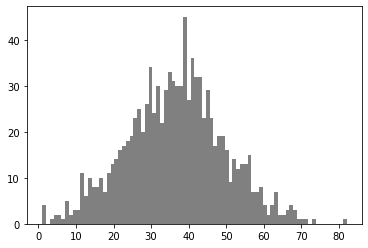

In [404]:
plt.hist(ages_population['observation'], bins=80, color= 'gray')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [412]:
ages_population.mean()

observation    36.56
dtype: float64

In [413]:
ages_population.std()

observation    12.8165
dtype: float64

In [305]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [415]:
ages_population2 = pd.read_csv('ages_population2.csv')
ages_population2


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [422]:
ages_population2.min()
ages_population2.max()

observation    36.0
dtype: float64

In [416]:
ages2 = ages_population2['observation'].value_counts().reset_index()
ages2.columns = ['age', 'frequency']
ages2

,age,frequency
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

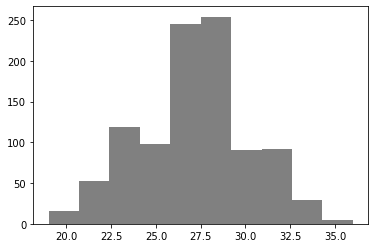

In [418]:
plt.hist(ages_population2['observation'], bins=10, color= 'gray')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [307]:
"""
The population in this neighbourhood of Barcelona is younger than the previous population.
And it has a lower dispersion of ages comparing to the previous population.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [423]:
ages_population2.mean()

observation    27.155
dtype: float64

In [424]:
ages_population2.std()

observation    2.969814
dtype: float64

In [309]:
"""
It confirms my previous statement regarding the age range and dispersion of this neighbourhood of Barcelona.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [425]:
ages_population3 = pd.read_csv('ages_population3.csv')
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [426]:
ages3 = ages_population3['observation'].value_counts().reset_index()
ages3.columns = ['age', 'frequency']
ages3

,age,frequency
0,32.0,37
1,35.0,31
2,37.0,31
3,39.0,29
4,36.0,26
...,...,...
70,76.0,1
71,9.0,1
72,1.0,1
73,5.0,1


(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

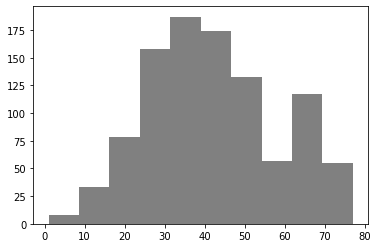

In [427]:
plt.hist(ages_population3['observation'], bins=10, color= 'gray')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [428]:
ages_population3.mean()

observation    41.989
dtype: float64

In [429]:
ages_population3.std()

observation    16.144706
dtype: float64

In [312]:
"""
The distribution of this third population  is a right-skewed distribution, most data falls to the right, or positive side, of the graph's peak. 
Thus, the histogram skews in such a way that its right side (or "tail") is longer than its left side
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [430]:
ages_population3.observation.quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [314]:
"""

The mean is 41.989 and the median is 40.0. 
On a right-skewed histogram, the mean, median, and mode are all different. 
In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak). 
The mean will always be to the right of the median.

"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [431]:
# s.quantile(np.linspace(.1, 1, 9, 0))
ages_population3.max()


observation    77.0
dtype: float64

In [432]:
ages_population3.min()

observation    1.0
dtype: float64

In [434]:
stats.iqr(ages_population3, interpolation = 'midpoint') 


23.0

In [316]:
"""
On a right-skewed the median (median = 40.0.) is closer to the first quartile (Q1 = 30.0) than the third quartile (Q3 =53.0). 
The fact that the right hand side tail of the distribution is longer than the left can also be seen.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [317]:
# your code here

In [318]:
"""
your comments here
"""

'\nyour comments here\n'